In [60]:
import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

from q_solve import generate_result
from q_solve import generate_result_envi_superpo
from q_solve import generate_result_more
from Schmidt_solve import compute_schmidt_states_new
from Schmidt_solve import compute_schmidt_full
from VN import plot_VN
from VN import compute_VN_time
from e_spectrum import plot_e_spectrum
from Neff import plot_Neff_schmidt_Neff_tot
from checkup import checkup
from make_gif import make_gif_distribs1s2_new
from make_gif import make_gif_distribs1s2_new_zoomed
from make_gif import make_gif_distrib_pointer
from make_gif import make_gif_distrib_pointer_s1
from make_gif import make_gif_distrib_pointer_s2
from make_gif import make_gif_distrib_interf

from overlap import plot_p_overlap_graph
from overlap import plot_p_overlap_graph_characterize
from similarities import probs_schmidt_in_energy_eigenstates
from similarities import metric_similarity_btw_s1_s2_plot


from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from PIL import Image
#from overlap import compute_schmidt_full


In [9]:
#testting the zoom
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.04
# Define the time settings for the simulation
tmax= 20
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)

In [10]:

eigenenergies_total, eigenstates_total = H_total.eigenstates() 
make_gif_distribs1s2_new(Int_strength,w,result,eigenstates_total,eigenenergies_total,[0],d1,d2,E_spacing,tmax,ind_nb)
make_gif_distribs1s2_new_zoomed(Int_strength,w,result,eigenstates_total,eigenenergies_total,[0],d1,d2,E_spacing,tmax,ind_nb)

[0]


In [11]:
# Replace 'path_to_your_gif.gif' with the path to your GIF file
gif_path = f'Gifs/distrib_schmidt1_2_over_energy_spectrum_EI_{Int_strength}_w_{w}_env_NA_d1_{d1}_d2_{d2}_Espace_{E_spacing}_tmax_{tmax}_ind_nb_{ind_nb}.gif'

gif_path_zoomed =f'Gifs/zoomed_distrib_schmidt1_2_over_energy_spectrum_EI_{Int_strength}_w_{w}_env_NA_d1_{d1}_d2_{d2}_Espace_{E_spacing}_tmax_{tmax}_ind_nb_{ind_nb}.gif'

# Create HTML code to display the GIF
html_code = f'<img src="{gif_path}">'
# Display the GIF
display(HTML(html_code))
# Create HTML code to display the GIF
html_code_z = f'<img src="{gif_path_zoomed}">'
# Display the GIF
display(HTML(html_code_z))


In [12]:
#Coarse graining. The idea is that looking at the overlap over time for s1 and s2 quickly goes to zero in the energy eigenbasis. But if we creat a caorsed grained energy eigenbasis, we would not see that at all. telling us that the splitting is microscopic.


/Users/maringirard/Dev/Quantum_Branching/VN.py:8: RuntimeWarning: divide by zero encountered in log2
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/maringirard/Dev/Quantum_Branching/VN.py:8: RuntimeWarning: invalid value encountered in multiply
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/maringirard/Dev/Quantum_Branching/Quantum_Branching/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/maringirard/Dev/Quantum_Branching/Quantum_Branching/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


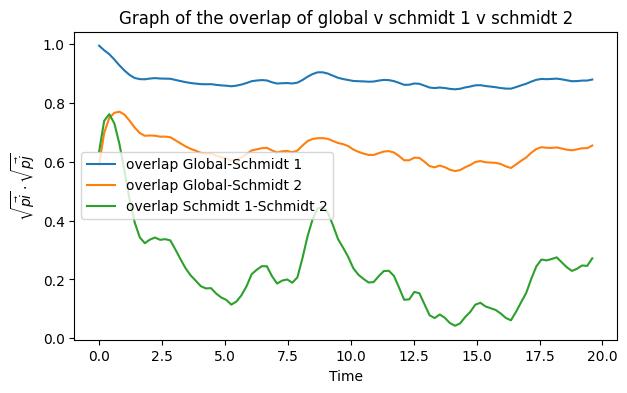

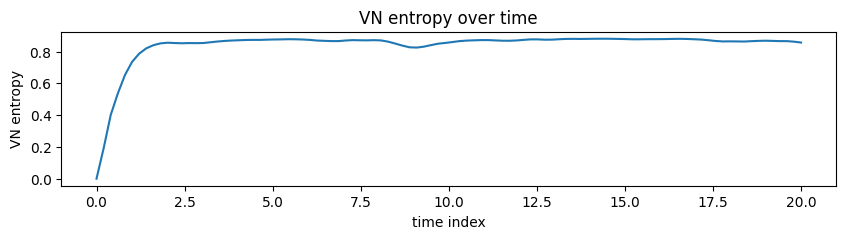

In [13]:
plot_p_overlap_graph(tlist,result,H_total,w,Int_strength,log_scale=False)

In [67]:

def get_p_s2(state,eigenstates_total):
    p=[abs(np.vdot(state, eigenstate)) ** 2  for eigenstate in eigenstates_total]
    return p

#def get_p(state,eigenstates_total):
#    p=[abs(np.vdot(state, eigenstate)) ** 2 for eigenstate in eigenstates_total]
#    return p

#def get_p_2(state,eigenstates_total):
#    p=[(abs(np.vdot(state, eigenstate)) ** 2) **2 for eigenstate in eigenstates_total]
#    return p

def p_overlap(state1,state2,eigenstates_total):
    sqrt_p1 = get_p_s2(state1,eigenstates_total)
    sqrt_p2 = get_p_s2(state2,eigenstates_total)
    overlap = np.dot(sqrt_p1, sqrt_p2)
    return overlap

'''
def compute_schmidt_full(result, idx,s=1):
    if s==1:
        a = compute_schmidt_states(result, idx, 0, 0)[0] #schmidt 1 on system 1
        b = compute_schmidt_states(result, idx, 1, 0)[0] #schmidt 2 on system 1
        g = np.tensordot(a, b, 0)
    elif s ==2:
        c = compute_schmidt_states(result, idx, 0, 0)[1] #schmidt 1 on system 1
        d = compute_schmidt_states(result, idx, 1, 0)[1] #schmidt 2 on system 1
        g = np.tensordot(c, d, 0)
    elif s==3:
        e = compute_schmidt_states(result, idx, 0, 0)[2] #schmidt 1 on system 1
        f = compute_schmidt_states(result, idx, 1, 0)[2] #schmidt 2 on system 1
        g = np.tensordot(e, f, 0)
    else: 
        print("wrong input value")
    return g
'''

def plot_p_overlap_graph(tlist,result,H_total,w,EI,log_scale=False):
    #o01 = []
    #o02 = []
    o12 = []
    eigenenergies_total, eigenstates_total = H_total.eigenstates()
    for idx in range(len(tlist)-2):
        s1=compute_schmidt_full(result,idx+1,1)
        s2=compute_schmidt_full(result,idx+1,2)
        global_state = result.states[idx+1]
        #s3=compute_schmidt_full(result,idx,3)
        #o01.append(p_overlap(global_state,s1,eigenstates_total))
        #o02.append(p_overlap(global_state,s2,eigenstates_total))
        o12.append(p_overlap(s1,s2,eigenstates_total))

    plt.figure(figsize=(7, 4))
    if log_scale:
        plt.xscale("log")
        plt.yscale("log")
    else:
        plt.xscale("linear")
        plt.yscale("linear")
    #plt.plot(tlist[0:len(tlist)-2],o01)
    #plt.plot(tlist[0:len(tlist)-2],o02)
    plt.plot(tlist[0:len(tlist)-2],o12)
    plt.title("Graph of the overlap of global v schmidt 1 v schmidt 2")
    plt.xlabel("Time")
    plt.ylabel(r"$\sqrt{\vec{pi}} \cdot \sqrt{\vec{pj}}$")
    plt.legend(['overlap Global-Schmidt 1', 'overlap Global-Schmidt 2', 'overlap Schmidt 1-Schmidt 2'])
    plt.savefig(f'Graphs/overlap_EI_{EI}_w_{w}.png')

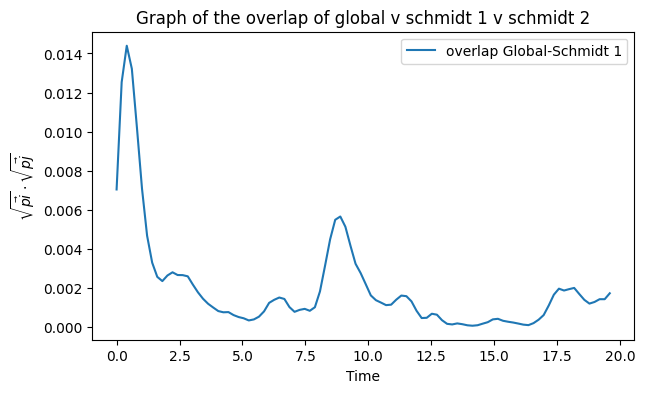

In [68]:
plot_p_overlap_graph(tlist,result,H_total,w,Int_strength,log_scale=False)

In [54]:
def get_p_s2_(state,eigenstates_total):
    p=[abs(np.vdot(state, eigenstate)) ** 2  for eigenstate in eigenstates_total]
    return p

In [69]:
def p_overlap_(state1,state2,eigenstates_total):
    sqrt_p1 = get_p_s2_(state1,eigenstates_total)
    sqrt_p2 = get_p_s2_(state2,eigenstates_total)
    coarsed_sqrt_p1 = []
    coarsed_sqrt_p2 = []
    for i in range(0, len(sqrt_p1), 2):
        # Check if there are enough elements for a sum of c values
        if i + c <= len(sqrt_p1):
            # Add the values of the c elements and append the sum to the sum_of_c_values list
            coarsed_sqrt_p1.append(sum(sqrt_p1[i:i + c]))
        else:
            # If there are fewer than c values left, append the sum of the remaining values
            coarsed_sqrt_p1.append(sum(sqrt_p1[i:]))
    for i in range(0, len(sqrt_p2), 2):
        # Check if there are enough elements for a sum of c values
        if i + c <= len(sqrt_p2):
            # Add the values of the c elements and append the sum to the sum_of_c_values list
            coarsed_sqrt_p2.append(sum(sqrt_p2[i:i + c]))
        else:
            # If there are fewer than c values left, append the sum of the remaining values
            coarsed_sqrt_p2.append(sum(sqrt_p2[i:]))
    overlap = np.dot(coarsed_sqrt_p1, coarsed_sqrt_p2)
    return overlap


In [71]:

def plot_p_overlap_graph_(tlist,result,H_total,w,EI,log_scale=False):
    #o01 = []
    #o02 = []
    o12 = []
    eigenenergies_total, eigenstates_total = H_total.eigenstates()
    for idx in range(len(tlist)-2):
        s1=compute_schmidt_full(result,idx+1,1)
        s2=compute_schmidt_full(result,idx+1,2)
        global_state = result.states[idx+1]
        #s3=compute_schmidt_full(result,idx,3)
        #o01.append(p_overlap_(global_state,s1,eigenstates_total))
        #o02.append(p_overlap_(global_state,s2,eigenstates_total))
        o12.append(p_overlap_(s1,s2,eigenstates_total))

#    coarsed = []
 #   for i in range(0, len(o12), 2):
  #      # Check if there are enough elements for a sum of c values
   #     if i + c <= len(o12):
            # Add the values of the c elements and append the sum to the sum_of_c_values list
    #        coarsed.append(sum(o12[i:i + c]))
     #   else:
      #      # If there are fewer than c values left, append the sum of the remaining values
       #     coarsed.append(sum(o12[i:]))
    #print(o12)
    #print(coarsed)
    plt.figure(figsize=(7, 4))
    if log_scale:
        plt.xscale("log")
        plt.yscale("log")
    else:
        plt.xscale("linear")
        plt.yscale("linear")
    plt.plot(tlist[0:len(tlist)-2],o12)
    plt.title(f'Graph of the overlap of global v schmidt 1 v schmidt 2 with coarse graining 2')
    plt.xlabel("Time")
    plt.ylabel(r"$\sqrt{\vec{pi}} \cdot \sqrt{\vec{pj}}$")
    plt.legend(['overlap Global-Schmidt 1', 'overlap Global-Schmidt 2', 'overlap Schmidt 1-Schmidt 2'])
    plt.savefig(f'Graphs/overlap_coarse_EI_{EI}_w_{w}.png')



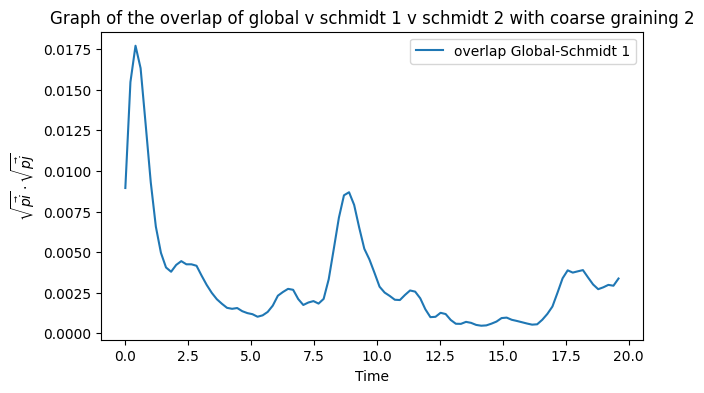

In [72]:
plot_p_overlap_graph_(tlist,result,H_total,w,Int_strength,log_scale=False)


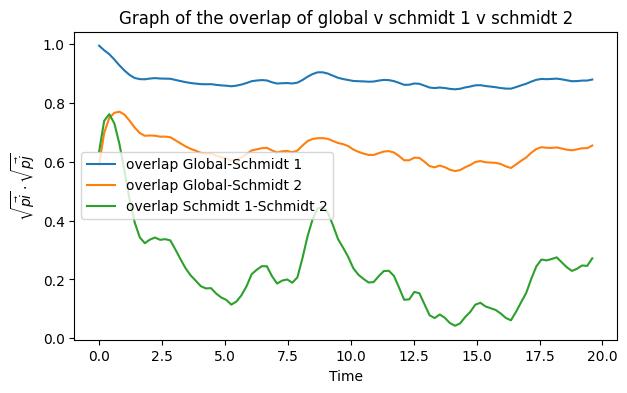

In [62]:
plot_p_overlap_graph(tlist,result,H_total,w,Int_strength,log_scale=False)
